In [1]:
import librosa
import numpy as np
import os

In [2]:
def get_params_melspectrogram(audio, sr):
	melspectrogram = np.mean(librosa.feature.melspectrogram(y=audio, sr=sr),   axis=1)
	return melspectrogram

def get_list_params(audio_list):
	list_params = []
	for file in audio_list:
		list_params.append(get_params_melspectrogram(audio=file[0], sr=file[1]))
	return list_params

def process_directory(root_dir):
    normal_audio_list = []
    abnormal_audio_list = []
    
    # Рекурсивный обход всех поддиректорий и файлов
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.wav', '.mp3')):  # Учитываются только аудиофайлы
                file_path = os.path.join(root, file)
                
                # Загружаем аудиофайл (например, с помощью librosa)
                audio, sr = librosa.load(file_path, sr=None)
                
                # Определяем, в какую категорию добавить файл
                if 'abnormal' in root.lower():
                    normal_audio_list.append((audio, sr))
                elif 'normal' in root.lower():
                    abnormal_audio_list.append((audio, sr))
    
    # Применение get_list_params к каждой группе файлов
    normal_params = get_list_params(normal_audio_list)
    abnormal_params = get_list_params(abnormal_audio_list)
    
    return normal_params, abnormal_params

In [3]:
normal_params, abnormal_params = process_directory("data")
normal = np.array(normal_params)
abnormal = np.array(abnormal_params)

In [4]:
abnormal

array([[1.18121784e-02, 4.73652594e-02, 2.28331253e-01, ...,
        5.94065523e-06, 3.34114588e-06, 2.13856811e-06],
       [1.44286305e-02, 4.74337116e-02, 2.26671159e-01, ...,
        3.45821786e-06, 2.12356076e-06, 1.54530585e-06],
       [3.15752253e-02, 7.39914030e-02, 2.96469182e-01, ...,
        1.41147575e-06, 1.13103681e-06, 7.12435849e-07],
       ...,
       [3.95283550e-02, 9.51272547e-02, 6.03286251e-02, ...,
        4.33517425e-06, 3.97144277e-06, 2.17471165e-06],
       [4.18334361e-03, 2.03454588e-02, 3.06759309e-02, ...,
        2.34107174e-05, 2.40401787e-05, 1.02258118e-05],
       [4.08392306e-03, 1.34218177e-02, 2.12808587e-02, ...,
        2.24307823e-05, 1.24799535e-05, 8.72486089e-06]], dtype=float32)

In [5]:
import pandas as pd


normal_dataframe = pd.DataFrame(normal)
normal_dataframe['type'] = 0

abnormal_dataframe = pd.DataFrame(abnormal)
abnormal_dataframe['type'] = 1

fan_df = pd.concat([normal_dataframe, abnormal_dataframe], axis=0)

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


y = fan_df['type']
X = fan_df.drop(['type'], axis=1)

selector = SelectKBest(f_classif, k=24)
selector.fit(X, y)

selected_indices = selector.get_support(indices=True)

X_new = X[selected_indices]
X_new

,0,1,2,3,4,8,9,10,12,13,...,27,35,36,48,54,70,73,76,80,81
0,0.043316,0.429797,1.903242,0.068481,0.072811,0.043342,0.015583,0.010541,0.017964,0.015098,...,0.003817,0.000768,0.000549,0.000501,0.000197,0.000108,0.000048,0.000030,0.000044,0.000027
1,0.057240,0.550323,2.440208,0.070026,0.077986,0.029593,0.014693,0.010591,0.018075,0.012282,...,0.002565,0.000983,0.000878,0.000414,0.000214,0.000058,0.000040,0.000023,0.000031,0.000023
2,0.056774,0.491629,2.158518,0.063669,0.067640,0.031489,0.014297,0.010786,0.016871,0.012846,...,0.002443,0.000674,0.000623,0.000445,0.000178,0.000175,0.000041,0.000025,0.000024,0.000024
3,0.065036,0.551656,2.405741,0.074983,0.098296,0.036003,0.017590,0.011258,0.017495,0.015077,...,0.002718,0.000617,0.000735,0.000896,0.000405,0.000070,0.000035,0.000028,0.000021,0.000021
4,0.072968,0.500057,2.105181,0.063213,0.076082,0.034396,0.017074,0.011344,0.018006,0.013412,...,0.002817,0.000747,0.001804,0.000694,0.000330,0.000075,0.000039,0.000038,0.000039,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12220,0.022821,0.054904,0.160287,0.050833,0.033355,0.032754,0.017221,0.025198,0.093598,0.023103,...,0.003781,0.110461,0.071288,0.002911,0.001500,0.001382,0.000580,0.000427,0.000507,0.000451
12221,0.001859,0.005717,0.007636,0.008158,0.118582,0.003322,0.002108,0.008552,0.060657,0.005286,...,0.085402,0.096858,0.061547,0.001724,0.000351,0.001004,0.000371,0.000366,0.000395,0.000356
12222,0.039528,0.095127,0.060329,0.023381,0.039480,0.032898,0.017515,0.014510,0.082857,0.008347,...,0.002566,0.126578,0.080043,0.001886,0.000285,0.001065,0.000381,0.000315,0.000409,0.000348
12223,0.004183,0.020345,0.030676,0.014680,0.071742,0.008960,0.004352,0.009292,0.079175,0.011320,...,0.070786,0.101431,0.072533,0.003334,0.000338,0.000992,0.000397,0.000683,0.000411,0.000366


In [7]:
selected_indices

array([ 0,  1,  2,  3,  4,  8,  9, 10, 12, 13, 14, 15, 19, 24, 27, 35, 36,
       48, 54, 70, 73, 76, 80, 81], dtype=int64)

In [8]:
X.shape

(16650, 128)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=42 )

In [10]:
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

randomforest_classifier_model = ensemble.RandomForestClassifier().fit(X_train, y_train)
randomforest_classifier_prediction = randomforest_classifier_model.predict(X_test)

print(metrics.classification_report(y_test, randomforest_classifier_prediction))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       892
           1       0.98      0.99      0.99      2438

    accuracy                           0.98      3330
   macro avg       0.98      0.97      0.98      3330
weighted avg       0.98      0.98      0.98      3330



In [11]:
bagging_classification_model = ensemble.BaggingClassifier().fit(X_train, y_train)
bagging_classification_prediction = bagging_classification_model.predict(X_test)

print(metrics.classification_report(y_test, bagging_classification_prediction))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       892
           1       0.98      0.98      0.98      2438

    accuracy                           0.97      3330
   macro avg       0.96      0.96      0.96      3330
weighted avg       0.97      0.97      0.97      3330



In [12]:
import pickle

with open('fan_bagging.pkl', 'wb') as file:
    pickle.dump(bagging_classification_model, file)

with open('fan_randomforest.pkl', 'wb') as file:
    pickle.dump(randomforest_classifier_model, file)

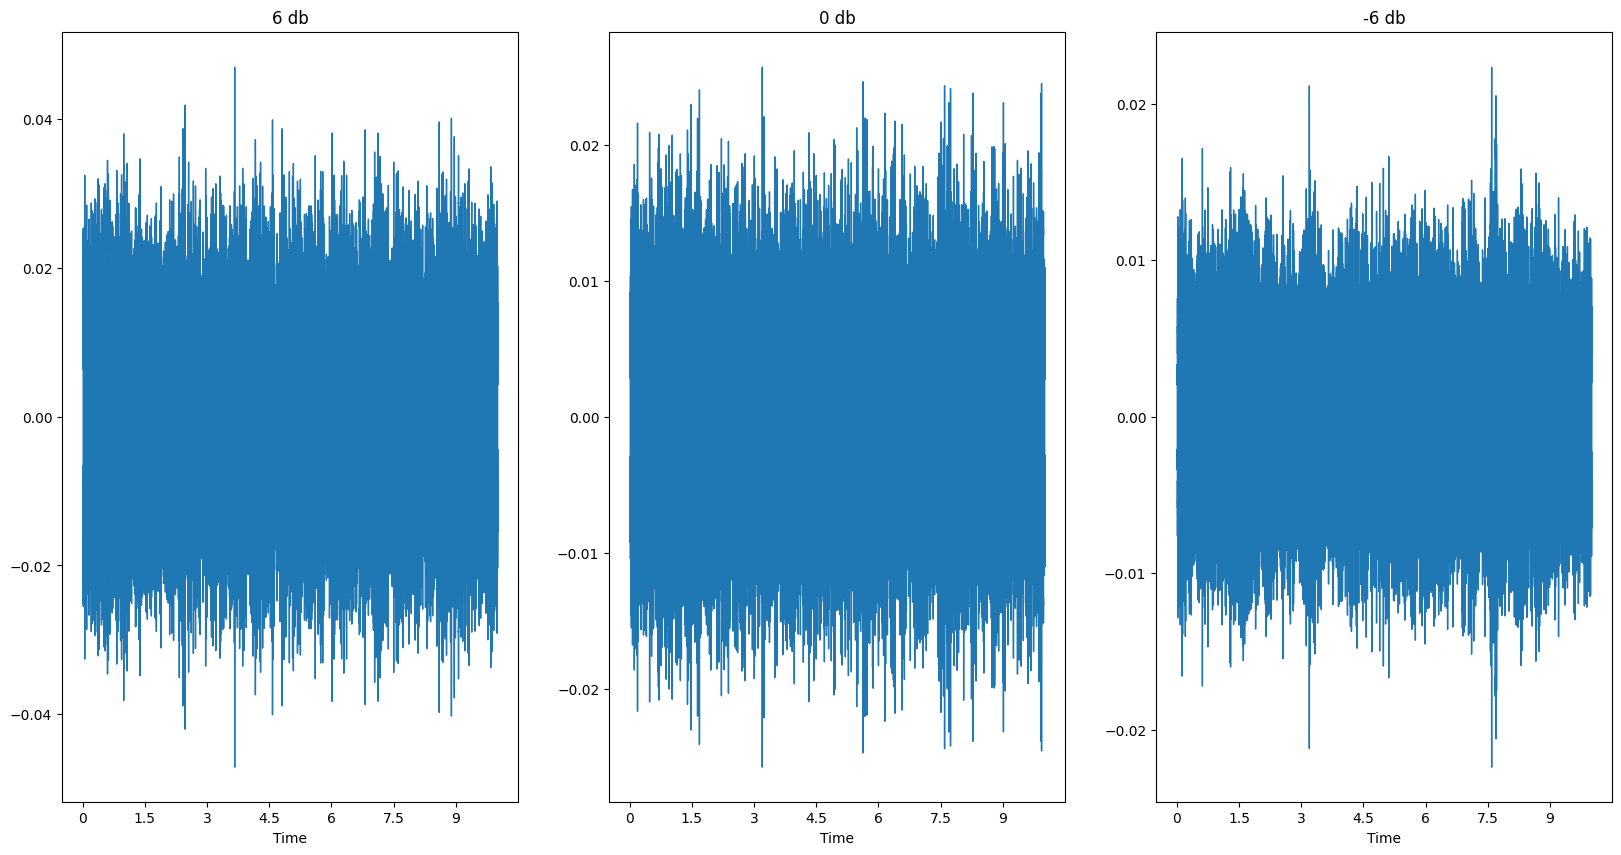

In [13]:
import matplotlib.pyplot as plt
import librosa.display as ld
import pylab

low, sr = librosa.load("data/low/id_00/normal/00000000.wav", sr=None)
normal, sr = librosa.load("data/normal/id_00/normal/00000000.wav", sr=None)
hight, sr = librosa.load("data/hight/id_00/normal/00000000.wav", sr=None)

pylab.figure(figsize=(20,10))
pylab.subplot (1, 3, 1)
pylab.title("6 db")
ld.waveshow(low, sr=sr)
pylab.subplot (1, 3, 2)
pylab.title("0 db")
ld.waveshow(normal, sr=sr)
pylab.subplot (1, 3, 3)
pylab.title("-6 db")
ld.waveshow(hight, sr=sr)


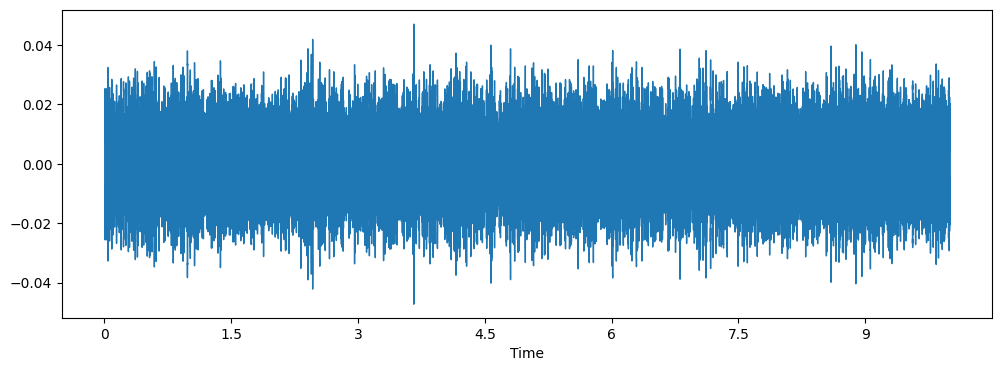

In [14]:
low, sr = librosa.load("data/low/id_00/normal/00000000.wav", sr=None)
plt.figure(figsize=(12,4))
ld.waveshow(low, sr=sr)

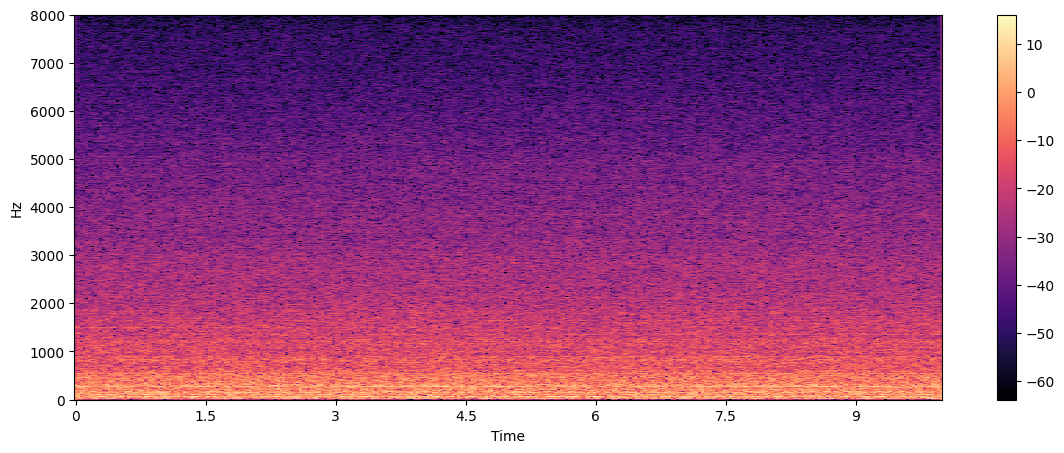

In [15]:
low, sr = librosa.load("data/low/id_00/normal/00000000.wav", sr=None)
x_plt = librosa.stft(low)
Xdb = librosa.amplitude_to_db(abs(x_plt))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

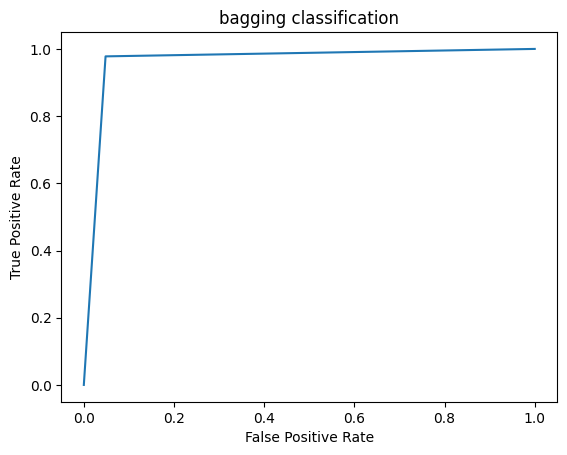

AUC: 0.965


In [19]:
fpr, tpr, _ = metrics.roc_curve(y_test, bagging_classification_prediction)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.title("bagging classification")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, bagging_classification_prediction)
print("AUC: %.3f" % auc)

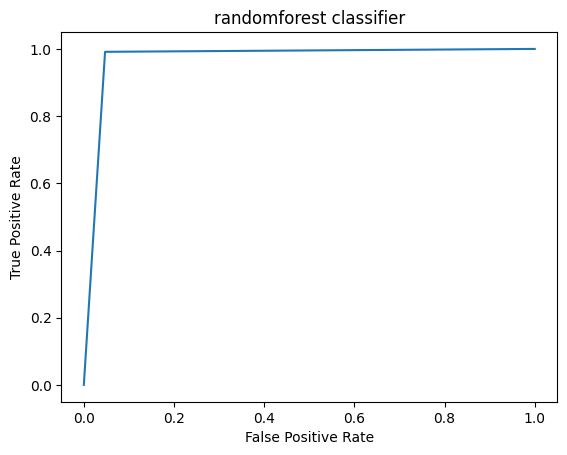

AUC: 0.972


In [20]:
fpr, tpr, _ = metrics.roc_curve(y_test, randomforest_classifier_prediction)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.title("randomforest classifier")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, randomforest_classifier_prediction)
print("AUC: %.3f" % auc)

In [21]:
import plotly.graph_objs as go

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))

reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))

fig = go.Figure(data=[trace, reference_line])

fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()